#### Importación de librerias

In [57]:
import biosignalsnotebooks as bsnb
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pywt

from numpy import array, mean, average, std, sum, sqrt, where, argmax
from numpy.random import normal
from scipy.signal import iirnotch, lfilter


#### Importación de las señales

In [58]:
Cervical_Inicial = np.genfromtxt("../sEMG_Signals/MusculosCervicales_FaseInicial.txt",  delimiter="\t",skip_header = 3)
Cervical_Final = np.genfromtxt("../sEMG_Signals/MusculosCervicales_FaseFinal.txt",  delimiter="\t",skip_header = 3)
Fs = 1000
Ts = 1/Fs
Cervical_Inicial = Cervical_Inicial[:,5]
Cervical_Inicial = Cervical_Inicial[:14506]
Cervical_Final = Cervical_Final[:,5]
Time1 = bsnb.generate_time(Cervical_Inicial, Fs)
Time2 = bsnb.generate_time(Cervical_Final, Fs)

In [59]:
# Funcion de transferencia
Gemg = 1009
Vcc = 3.3
n = 10

Cervical_Inicial = (((Cervical_Inicial/2**n)-(1/2))*Vcc)/Gemg
Cervical_Inicial = Cervical_Inicial * 1000

Cervical_Final = (((Cervical_Final/2**n)-(1/2))*Vcc)/Gemg
Cervical_Final = Cervical_Final * 1000

#### Señal incial

##### Visualización

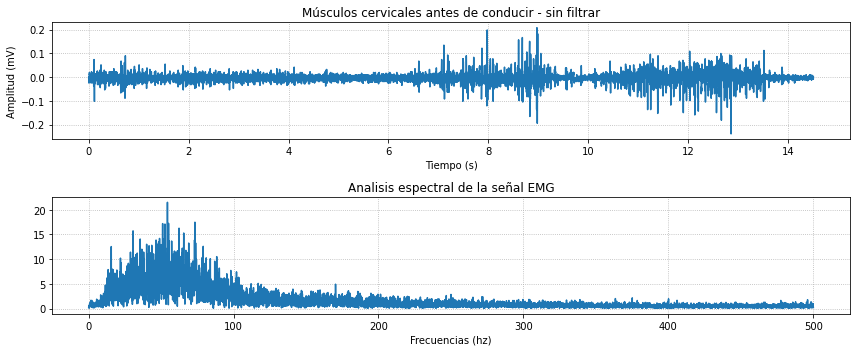

In [60]:
#Transformada de Fourier
freq_axis_1, power_spect_1 = bsnb.plotfft(Cervical_Inicial, Fs)

#Visualización de la señal
plt.figure(figsize=(12,5))
plt.subplot(211)
plt.subplots_adjust(hspace=0.6, wspace=0.6)
plt.plot(Time1,Cervical_Inicial)
plt.grid(linestyle=":")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (mV)")
plt.title("Músculos cervicales antes de conducir - sin filtrar")    # graficamos la señal

#Respuesta en frecuecnia
plt.subplot(212)
plt.grid(linestyle=":")
plt.title("Analisis espectral de la señal EMG")
plt.xlabel("Frecuencias (hz)")
plt.plot(freq_axis_1, power_spect_1)
plt.tight_layout()
fig = plt.gcf()
fig.set_facecolor('white')
#plt.savefig('EMGyFFT_crudo.png', transparent=False, )
plt.show()

##### Filtrado

In [61]:
Cervical_InicialFilter = bsnb.bandpass(Cervical_Inicial, f1=30,f2=350, order=8, fs=Fs)

# Utilizar filtros Notch para quitar frecuencias que hagan ruido # Frecuencia de muestreo (Hz)
f0 = 60.0  # Frecuencia que queremos filtrar (Hz)
Q = 20.0  # Factor de Calidad
# Diseño de filtro notch
b, a = iirnotch(f0, Q, Fs)
Cervical_InicialFilter = lfilter(b, a, Cervical_InicialFilter)
Cervical_InicialFilter = lfilter(b, a, Cervical_InicialFilter)

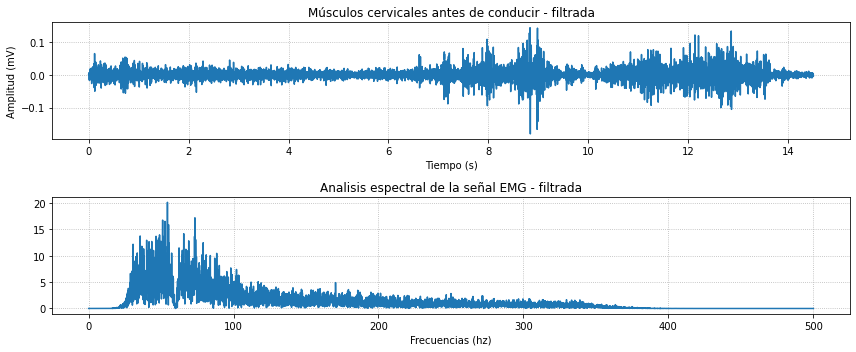

In [62]:
#Transformada de Fourier
freq_axis_2, power_spect_2 = bsnb.plotfft(Cervical_InicialFilter, Fs)

#Visualización de la señal
plt.figure(figsize=(12,5))
plt.subplot(211)
plt.subplots_adjust(hspace=0.6, wspace=0.6)
plt.plot(Time1,Cervical_InicialFilter)
plt.grid(linestyle=":")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (mV)")
plt.title("Músculos cervicales antes de conducir - filtrada")    # graficamos la señal

#Respuesta en frecuecnia
plt.subplot(212)
plt.grid(linestyle=":")
plt.title("Analisis espectral de la señal EMG - filtrada")
plt.xlabel("Frecuencias (hz)")
plt.plot(freq_axis_2, power_spect_2)
plt.tight_layout()
fig = plt.gcf()
fig.set_facecolor('white')
#plt.savefig('EMGyFFT_crudo.png', transparent=False, )
plt.show()

##### Características

In [63]:
Caracteristicas_Inicial = {}
Caracteristicas_Inicial = bsnb.emg_parameters(Cervical_InicialFilter, Fs, raw_to_mv=False)


Text(0.5, 1.0, 'Músculos cervicales antes de conducir - filtrada')

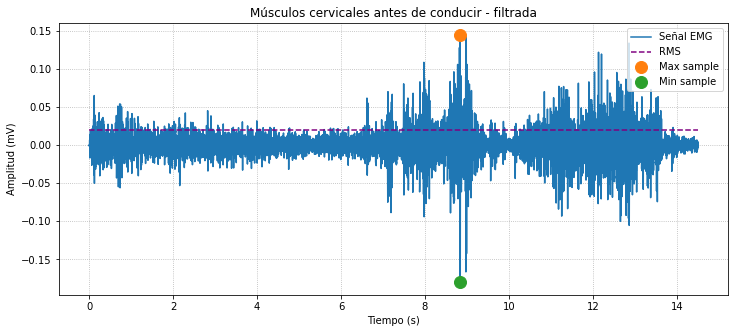

In [64]:

rms = sqrt(sum(Cervical_InicialFilter * Cervical_InicialFilter) / len(Cervical_InicialFilter))
# Maximum
max_sample_value = max(Cervical_InicialFilter)
pos = argmax(Cervical_InicialFilter)
# Minimum
min_sample_value = min(Cervical_InicialFilter)
posmin = np.argmin(Cervical_InicialFilter)
# Average and Standard Deviation
avg_sample_value = average(Cervical_InicialFilter)
std_sample_value = std(Cervical_InicialFilter)
Amplitud = max_sample_value - min_sample_value
Caracteristicas_Inicial["Amplitud"] = Amplitud


#Ploteo de característias
plt.figure(figsize=(12,5))
plt.plot(Time1,Cervical_InicialFilter)
plt.plot([0, Time1[-1]] , [rms, rms], color='purple', linestyle='dashed')#coordenadas x1,x2 - y1,y2
plt.plot(Time1[pos],max_sample_value,'o',ms=12)
plt.plot(Time1[posmin],min_sample_value,'o',ms=12)
plt.grid(linestyle=":")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (mV)")
plt.legend(["Señal EMG", "RMS","Max sample","Min sample"], loc ="upper right")
plt.title("Músculos cervicales antes de conducir - filtrada")    # graficamos la señal

##### Señal después de conducir

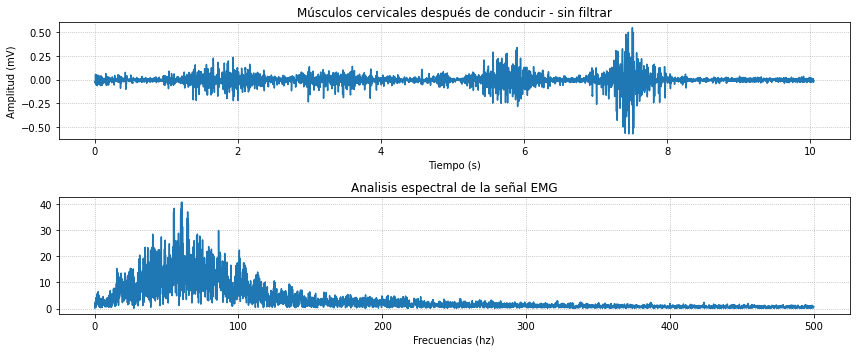

In [65]:
#Transformada de Fourier
freq_axis_3, power_spect_3 = bsnb.plotfft(Cervical_Final, Fs)

#Visualización de la señal
plt.figure(figsize=(12,5))
plt.subplot(211)
plt.subplots_adjust(hspace=0.6, wspace=0.6)
plt.plot(Time2,Cervical_Final)
plt.grid(linestyle=":")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (mV)")
plt.title("Músculos cervicales después de conducir - sin filtrar")    # graficamos la señal

#Respuesta en frecuecnia
plt.subplot(212)
plt.grid(linestyle=":")
plt.title("Analisis espectral de la señal EMG")
plt.xlabel("Frecuencias (hz)")
plt.plot(freq_axis_3, power_spect_3)
plt.tight_layout()
fig = plt.gcf()
fig.set_facecolor('white')
#plt.savefig('EMGyFFT_crudo.png', transparent=False, )
plt.show()

##### Filtrado

In [66]:
Cervical_FinalFilter = bsnb.bandpass(Cervical_Final, f1=30,f2=350, order=8, fs=Fs)

# Utilizar filtros Notch para quitar frecuencias que hagan ruido # Frecuencia de muestreo (Hz)
f0 = 60.0  # Frecuencia que queremos filtrar (Hz)
Q = 20.0  # Factor de Calidad
# Diseño de filtro notch
b, a = iirnotch(f0, Q, Fs)
Cervical_FinalFilter = lfilter(b, a, Cervical_FinalFilter)
Cervical_FinalFilter = lfilter(b, a, Cervical_FinalFilter)

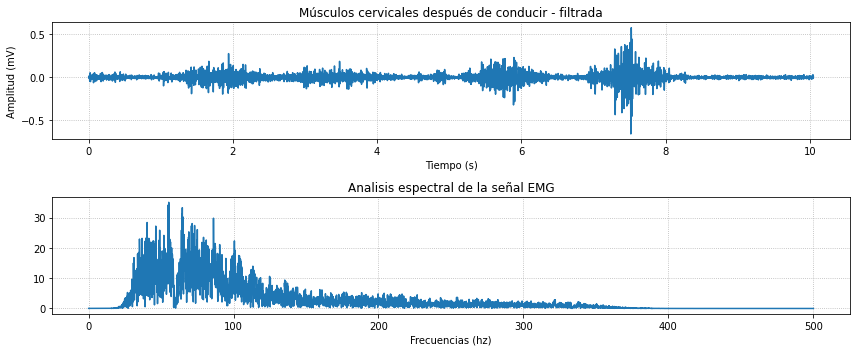

In [67]:
#Transformada de Fourier
freq_axis_4, power_spect_4 = bsnb.plotfft(Cervical_FinalFilter, Fs)

#Visualización de la señal
plt.figure(figsize=(12,5))
plt.subplot(211)
plt.subplots_adjust(hspace=0.6, wspace=0.6)
plt.plot(Time2,Cervical_FinalFilter)
plt.grid(linestyle=":")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (mV)")
plt.title("Músculos cervicales después de conducir - filtrada")    # graficamos la señal

#Respuesta en frecuecnia
plt.subplot(212)
plt.grid(linestyle=":")
plt.title("Analisis espectral de la señal EMG")
plt.xlabel("Frecuencias (hz)")
plt.plot(freq_axis_4, power_spect_4)
plt.tight_layout()
fig = plt.gcf()
fig.set_facecolor('white')
#plt.savefig('EMGyFFT_crudo.png', transparent=False, )
plt.show()

##### Características

Text(0.5, 1.0, 'Músculos cervicales después de conducir - filtrada')

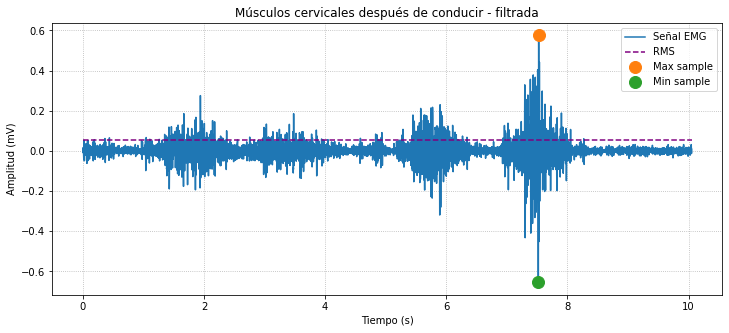

In [68]:
Caracteristicas_Final = {}
Caracteristicas_Final = bsnb.emg_parameters(Cervical_FinalFilter, Fs, raw_to_mv=False)

Caracteristicas_Final = {}
Caracteristicas_Final = bsnb.emg_parameters(Cervical_FinalFilter, Fs, raw_to_mv=False)

rms = sqrt(sum(Cervical_FinalFilter * Cervical_FinalFilter) / len(Cervical_FinalFilter))
# Maximum
max_sample_value = max(Cervical_FinalFilter)
pos = argmax(Cervical_FinalFilter)
# Minimum
min_sample_value = min(Cervical_FinalFilter)
posmin = np.argmin(Cervical_FinalFilter)
# Average and Standard Deviation
avg_sample_value = average(Cervical_FinalFilter)
std_sample_value = std(Cervical_FinalFilter)
Amplitud = max_sample_value - min_sample_value
Caracteristicas_Final["Amplitud"] = Amplitud


#Ploteo de características
plt.figure(figsize=(12,5))
plt.plot(Time2,Cervical_FinalFilter)
plt.plot([0, Time2[-1]] , [rms, rms], color='purple', linestyle='dashed')#coordenadas x1,x2 - y1,y2
plt.plot(Time2[pos],max_sample_value,'o',ms=12)
plt.plot(Time2[posmin],min_sample_value,'o',ms=12)
plt.grid(linestyle=":")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (mV)")
plt.legend(["Señal EMG", "RMS","Max sample","Min sample"], loc ="upper right")
plt.title("Músculos cervicales después de conducir - filtrada")    # graficamos la señal


In [69]:
import json

comparison_car = {}
comparison_car["Caracteristicas iniciales"] = Caracteristicas_Inicial 
comparison_car["Caracteristicas finales"] = Caracteristicas_Final
print(json.dumps(comparison_car, indent=4))

{
    "Caracteristicas iniciales": {
        "Number of Muscular Activations": 4,
        "Maximum Muscular Activation Duration": 3.129215718717685,
        "Minimum Muscular Activation Duration": 0.17701220268872805,
        "Average Muscular Activation Duration": 1.5836091692519823,
        "Standard Deviation of Muscular Activation Duration": 1.2215383630472902,
        "Maximum Sample Value": 0.14365960180222082,
        "Minimum Sample Value": -0.18028530340725232,
        "Average Sample Value": -4.3865973675764374e-07,
        "Standard Deviation Sample Value": 0.020200877680562928,
        "RMS": 0.02020087768532565,
        "Area": -0.0047363122453612,
        "Total Power Spect": 0.00042262971278742847,
        "Median Frequency": 66.40625,
        "Maximum Power Frequency": 50.78125,
        "Amplitud": 0.32394490520947317
    },
    "Caracteristicas finales": {
        "Number of Muscular Activations": 3,
        "Maximum Muscular Activation Duration": 0.8700865757786849,
 

In [70]:
auxIni = list(Caracteristicas_Inicial.values())
Values_Iniciales = np.array(auxIni[8:])

auxFin = list(Caracteristicas_Final.values())
Values_Finales = np.array(auxFin[8:])


In [71]:
# # import csv
# import pandas as pd

# def agregar_filas_con_nombres(nombre_archivo, nuevas_filas, nombres_filas, nombre_columnas):
#     try:
#         # Intenta cargar el archivo CSV existente como DataFrame
#         df = pd.read_csv(nombre_archivo, index_col='Nombres')
#     except FileNotFoundError:
#         # Si el archivo no existe, crea un DataFrame vacío
#         df = pd.DataFrame()

#     # Crea un DataFrame con las nuevas filas y nombres de filas
#     df = pd.DataFrame(nuevas_filas, index=nombres_filas, columns=nombre_columnas)

#     return df

# nombre_del_archivo = 'Dataset1.csv'

# # Nuevas filas que quieres agregar (una lista de listas)
# nuevas_filas = [Values_Iniciales, Values_Finales]

# #Nombres columnas
# nombres_nuevas_filas =  ['Cervicales_FaseInicialFilter', 'Cervicales_FaseFinallFilter']

# nombre_columnas =['Derivacion estandar','RMS','Area','Total power spect','Median Frequency', 
#                   'Maximum power frequency', 'Amplitud']
# df_ultimate= agregar_filas_con_nombres(nombre_del_archivo, nuevas_filas, nombres_nuevas_filas, nombre_columnas)

# df_ultimate.to_csv(nombre_del_archivo, index=nombres_nuevas_filas)

In [72]:
# longitud_inicial = len(Cervical_InicialFilter)
# longitud_final = len(Cervical_FinalFilter)
# max_len = max(len(Cervical_InicialFilter), len(Cervical_FinalFilter))

# if longitud_inicial > longitud_final:
#     finalTibial = np.zeros(longitud_inicial)
#     Cervical_FinalFilter = np.pad(Cervical_FinalFilter, (0, max_len - len(Cervical_FinalFilter)), 'constant')
  
# else:
#     inicialTibial = np.zeros(longitud_final)
#     Cervical_InicialFilter = np.pad(Cervical_InicialFilter, (0, max_len - len(Cervical_InicialFilter)), 'constant')

In [73]:
# # import csv
# import pandas as pd

# def agregar_filas_con_nombres(nombre_archivo, nuevas_filas, nombres_filas):
#     try:
#         # Intenta cargar el archivo CSV existente como DataFrame
#         df = pd.read_csv(nombre_archivo, index_col='Nombres')
#     except FileNotFoundError:
#         # Si el archivo no existe, crea un DataFrame vacío
#         df = pd.DataFrame()

#     # Crea un DataFrame con las nuevas filas y nombres de filas
#     df = pd.DataFrame(nuevas_filas, index=nombres_filas)

#     return df

# nombre_del_archivo = 'Cervicales_ML.csv'

# # Nuevas filas que quieres agregar (una lista de listas)
# nuevas_filas = [Cervical_InicialFilter, Cervical_FinalFilter]

# #Nombres columnas
# nombres_nuevas_filas =  ['Cervical_FaseInicialFilter', 'Cervical_FaseInicialFilter']

# df_ultimate= agregar_filas_con_nombres(nombre_del_archivo, nuevas_filas, nombres_nuevas_filas)

# df_ultimate = df_ultimate.transpose()
# df_ultimate.to_csv(nombre_del_archivo, index=None)